# Predicting Employee Attrition

Installing and Importing Libaries 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

Importing file (csv)

In [50]:
# Import the treated data
df = pd.read_csv('../dados/df.csv')

In [51]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


## Exploring Attrition

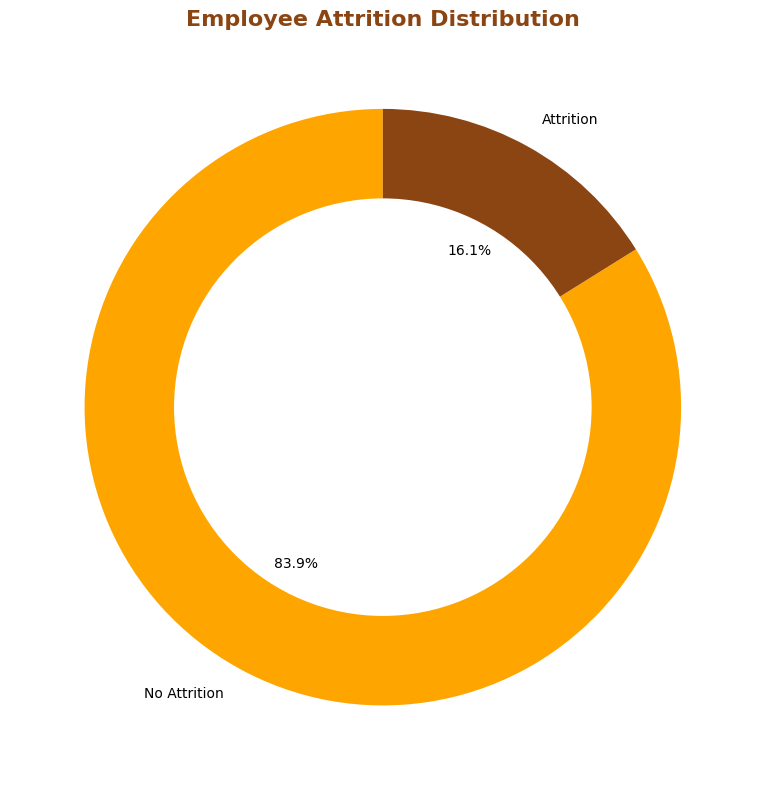

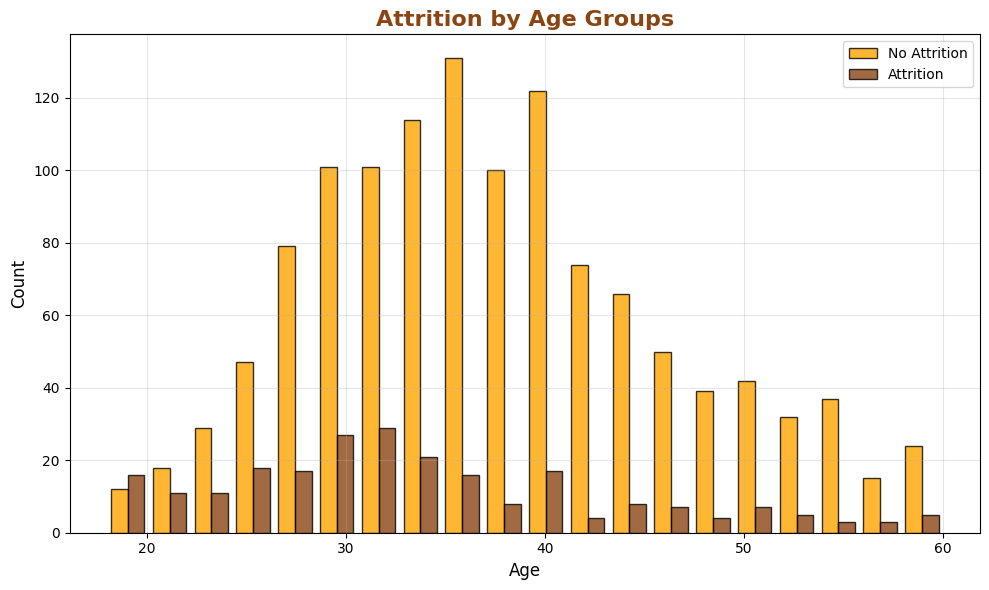

<Figure size 1000x600 with 0 Axes>

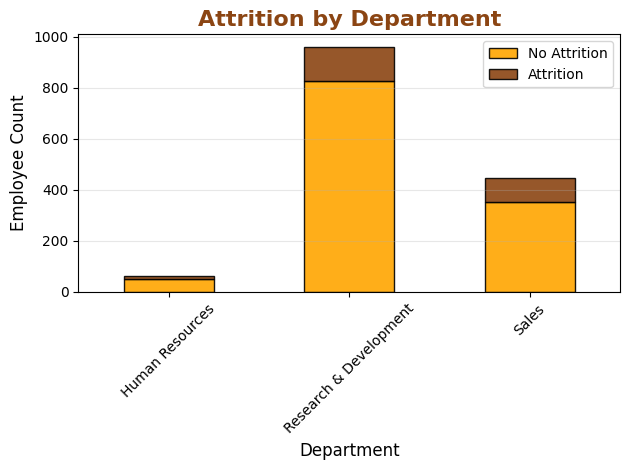

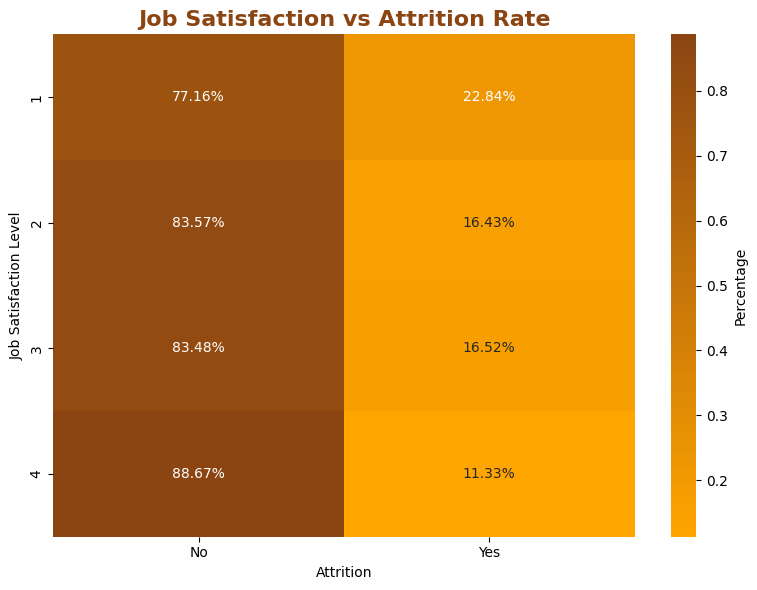

C:\Users\carla\AppData\Local\Temp\ipykernel_3704\4235563411.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df,


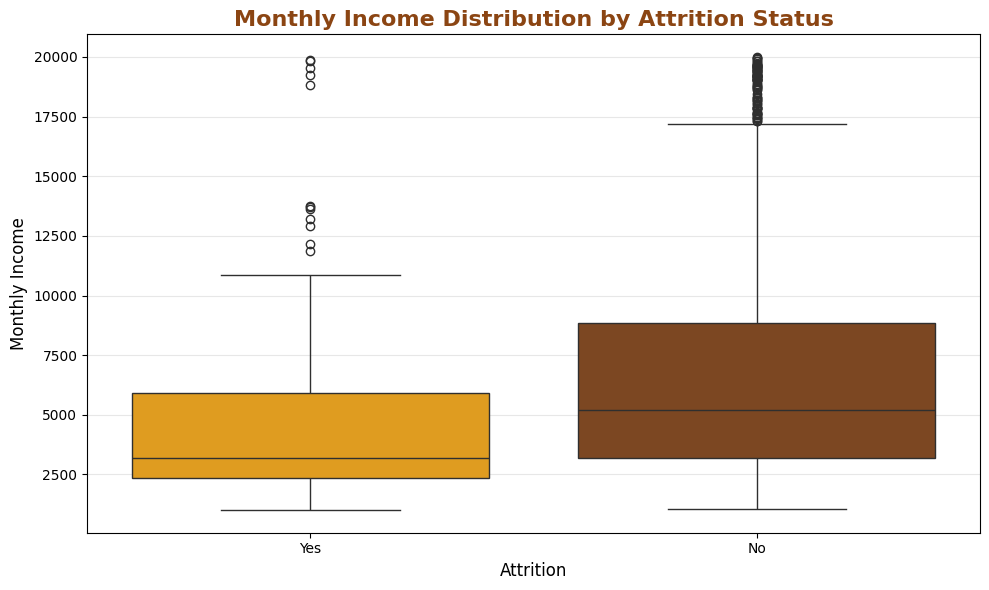

C:\Users\carla\AppData\Local\Temp\ipykernel_3704\4235563411.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='YearsAtCompany', data=df,


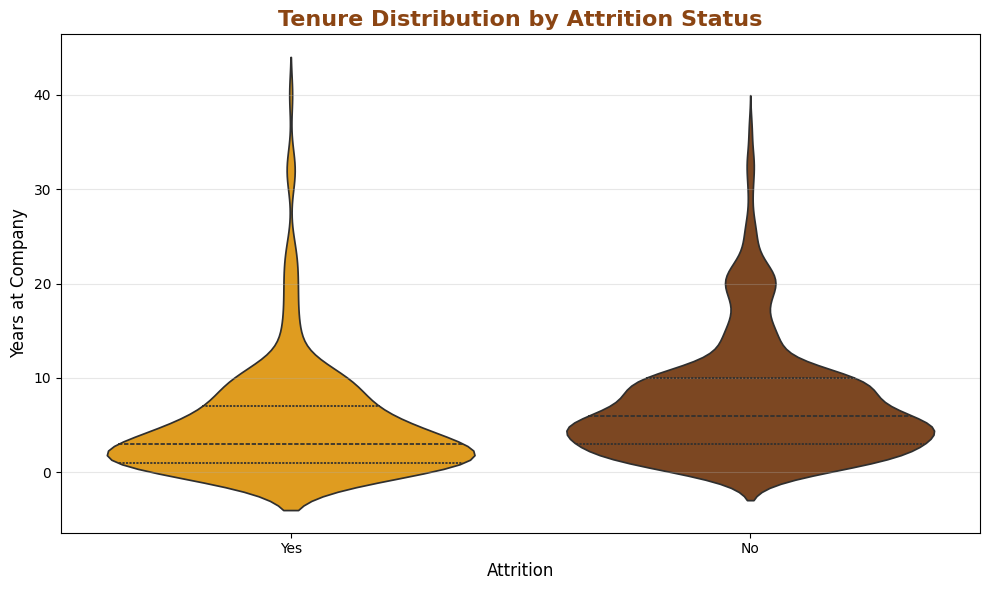

<Figure size 800x600 with 0 Axes>

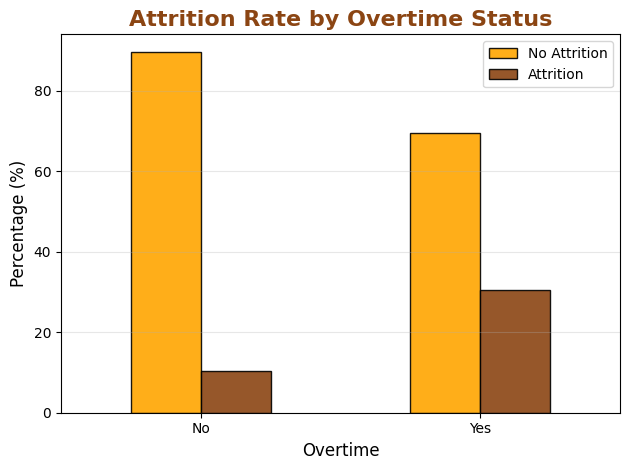

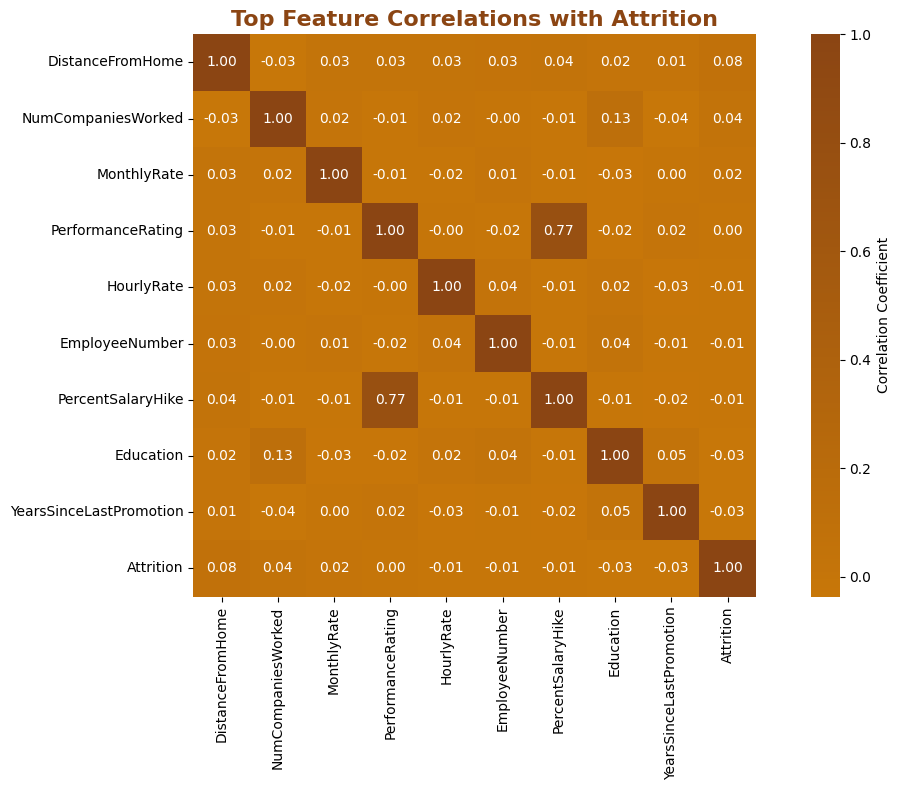

<Figure size 800x600 with 0 Axes>

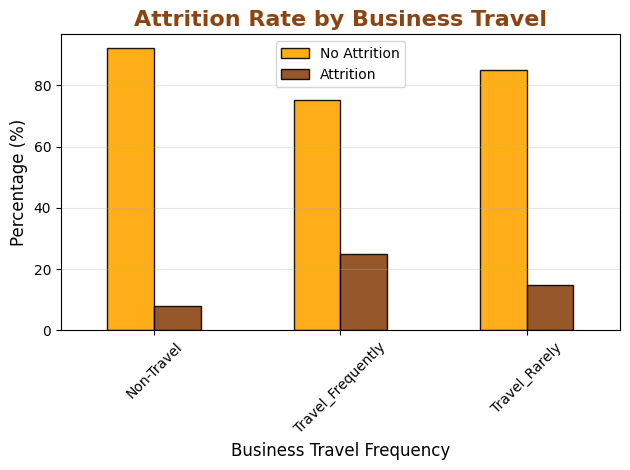

KEY INSIGHTS

1. OVERALL ATTRITION:
   • 237 out of 1,470 employees left (16.1%)

2. AGE ANALYSIS:
   • Average age of employees who left: 33.6 years
   • Average age of employees who stayed: 37.6 years

3. DEPARTMENT ATTRITION RATES:
   • Sales: 20.6%
   • Human Resources: 19.0%
   • Research & Development: 13.8%

4. INCOME ANALYSIS:
   • Average income (left): $4,787
   • Average income (stayed): $6,833
   • Employees who stay earn 42.7% more

5. TENURE ANALYSIS:
   • Average tenure (left): 5.1 years
   • Average tenure (stayed): 7.4 years

6. OVERTIME IMPACT:
   • Attrition with overtime: 30.5%
   • Attrition without overtime: 10.4%

7. TOP CORRELATED FACTORS (excluding self-correlation):
   • TotalWorkingYears: -0.171 (Lower values correlate with attrition)
   • JobLevel: -0.169 (Lower values correlate with attrition)
   • YearsInCurrentRole: -0.161 (Lower values correlate with attrition)

8. BUSINESS TRAVEL IMPACT:
   • Travel_Frequently: 24.9% attrition
   • Travel_Rarely: 15.0% 

In [ ]:
# Set orange/brown color palette
orange_palette = ["#FFA500", "#FF8C00", "#FF7F50", "#D2691E", "#8B4513", "#A0522D"]
brown_orange_cmap = LinearSegmentedColormap.from_list("brown_orange", ["#FFA500", "#8B4513"])

# Convert 'Yes'/'No' to numeric for correlation analysis only
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# GRAPH 1: ATTRITION OVERVIEW - Donut Chart
plt.figure(figsize=(8, 8))
attrition_counts = df['Attrition'].value_counts()
colors = ['#FFA500', '#8B4513']
labels = ['No Attrition', 'Attrition']

plt.pie(attrition_counts.values, labels=labels, 
        colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Employee Attrition Distribution', fontsize=16, fontweight='bold', color='#8B4513')
plt.tight_layout()
plt.savefig(f'{graphs_dir}attrition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# GRAPH 2: ATTRITION BY AGE - Histogram
plt.figure(figsize=(10, 6))
no_attrition = df[df['Attrition'] == 'No']['Age']
attrition = df[df['Attrition'] == 'Yes']['Age']

plt.hist([no_attrition, attrition], bins=20, 
         color=['#FFA500', '#8B4513'], label=['No Attrition', 'Attrition'], 
         alpha=0.8, edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Attrition by Age Groups', fontsize=16, fontweight='bold', color='#8B4513')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{graphs_dir}attrition_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

# GRAPH 3: ATTRITION BY DEPARTMENT - Stacked Bar Chart
plt.figure(figsize=(10, 6))
if 'Department' in df.columns:
    dept_attrition = pd.crosstab(df['Department'], df['Attrition'])
    dept_attrition.plot(kind='bar', stacked=True, 
                        color=['#FFA500', '#8B4513'], 
                        edgecolor='black', alpha=0.9)
    plt.xlabel('Department', fontsize=12)
    plt.ylabel('Employee Count', fontsize=12)
    plt.title('Attrition by Department', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}attrition_by_department.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 4: JOB SATISFACTION vs ATTRITION - Heatmap
plt.figure(figsize=(8, 6))
if 'JobSatisfaction' in df.columns:
    satisfaction_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index')
    sns.heatmap(satisfaction_attrition, annot=True, fmt='.2%', 
                cmap=brown_orange_cmap, 
                cbar_kws={'label': 'Percentage'})
    plt.title('Job Satisfaction vs Attrition Rate', fontsize=16, fontweight='bold', color='#8B4513')
    plt.xlabel('Attrition')
    plt.ylabel('Job Satisfaction Level')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}job_satisfaction_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 5: MONTHLY INCOME DISTRIBUTION - Box Plot
plt.figure(figsize=(10, 6))
if 'MonthlyIncome' in df.columns:
    sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, 
                palette=['#FFA500', '#8B4513'])
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Monthly Income', fontsize=12)
    plt.title('Monthly Income Distribution by Attrition Status', 
              fontsize=16, fontweight='bold', color='#8B4513')
    
    # Use log scale if income distribution is skewed
    if df['MonthlyIncome'].max() / df['MonthlyIncome'].min() > 100:
        plt.yscale('log')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}income_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 6: YEARS AT COMPANY - Violin Plot
plt.figure(figsize=(10, 6))
if 'YearsAtCompany' in df.columns:
    sns.violinplot(x='Attrition', y='YearsAtCompany', data=df, 
                   palette=['#FFA500', '#8B4513'], inner='quartile')
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Years at Company', fontsize=12)
    plt.title('Tenure Distribution by Attrition Status', 
              fontsize=16, fontweight='bold', color='#8B4513')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}tenure_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 7: OVERWORK ANALYSIS - Overtime vs Attrition
plt.figure(figsize=(8, 6))
if 'OverTime' in df.columns:
    overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
    overtime_attrition.plot(kind='bar', color=['#FFA500', '#8B4513'], 
                           edgecolor='black', alpha=0.9)
    plt.xlabel('Overtime', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Attrition Rate by Overtime Status', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}overtime_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 8: CORRELATION HEATMAP (Top Features - WITHOUT Attrition_numeric)
plt.figure(figsize=(12, 8))

# Prepare data for correlation - EXCLUDE the Attrition_numeric column
numeric_df = df.select_dtypes(include=[np.number])

# Check if Attrition_numeric exists and remove it from the DataFrame for correlation
if 'Attrition_numeric' in numeric_df.columns:
    # Create a copy without Attrition_numeric
    numeric_df_corr = numeric_df.drop(columns=['Attrition_numeric'])
    
    # Add the numeric attrition column separately
    numeric_df_corr['Attrition'] = df['Attrition_numeric']
    
    # Calculate correlation
    correlation_matrix = numeric_df_corr.corr()
    
    # Get top correlations with attrition (excluding Attrition itself)
    if 'Attrition' in correlation_matrix.columns:
        attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
        
        # Get top features excluding 'Attrition' itself
        top_features = attrition_corr.drop('Attrition').head(9).index  # Get top 9 features
        
        if len(top_features) > 1:
            # Add Attrition back to the top features for display
            display_features = list(top_features) + ['Attrition']
            top_corr = correlation_matrix.loc[display_features, display_features]
            
            sns.heatmap(top_corr, annot=True, cmap=brown_orange_cmap, 
                        center=0, fmt='.2f', square=True,
                        cbar_kws={'label': 'Correlation Coefficient'})
            plt.title('Top Feature Correlations with Attrition', 
                      fontsize=16, fontweight='bold', color='#8B4513')
            plt.tight_layout()
            plt.savefig(f'{graphs_dir}correlation_heatmap.png', dpi=300, bbox_inches='tight')
            plt.show()

# GRAPH 9: BUSINESS TRAVEL IMPACT
plt.figure(figsize=(8, 6))
if 'BusinessTravel' in df.columns:
    travel_attrition = pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index') * 100
    travel_attrition.plot(kind='bar', color=['#FFA500', '#8B4513'], 
                         edgecolor='black', alpha=0.9)
    plt.xlabel('Business Travel Frequency', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Attrition Rate by Business Travel', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}business_travel_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

# Calculate key statistics for PPT
print("="*60)
print("KEY INSIGHTS")
print("="*60)

# 1. Overall attrition rate
total_employees = len(df)
attrition_count = (df['Attrition'] == 'Yes').sum()
attrition_rate = (attrition_count / total_employees) * 100
print(f"\n1. OVERALL ATTRITION:")
print(f"   • {attrition_count:,} out of {total_employees:,} employees left ({attrition_rate:.1f}%)")

# 2. Age analysis
avg_age_attrition = df[df['Attrition'] == 'Yes']['Age'].mean()
avg_age_stay = df[df['Attrition'] == 'No']['Age'].mean()
print(f"\n2. AGE ANALYSIS:")
print(f"   • Average age of employees who left: {avg_age_attrition:.1f} years")
print(f"   • Average age of employees who stayed: {avg_age_stay:.1f} years")

# 3. Department analysis
if 'Department' in df.columns:
    dept_analysis = df.groupby('Department')['Attrition_numeric'].mean().sort_values(ascending=False) * 100
    print(f"\n3. DEPARTMENT ATTRITION RATES:")
    for dept, rate in dept_analysis.items():
        print(f"   • {dept}: {rate:.1f}%")

# 4. Income analysis
if 'MonthlyIncome' in df.columns:
    income_attrition = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
    income_stay = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
    income_diff = ((income_stay - income_attrition) / income_attrition) * 100
    print(f"\n4. INCOME ANALYSIS:")
    print(f"   • Average income (left): ${income_attrition:,.0f}")
    print(f"   • Average income (stayed): ${income_stay:,.0f}")
    print(f"   • Employees who stay earn {income_diff:.1f}% more")

# 5. Tenure analysis
if 'YearsAtCompany' in df.columns:
    tenure_attrition = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()
    tenure_stay = df[df['Attrition'] == 'No']['YearsAtCompany'].mean()
    print(f"\n5. TENURE ANALYSIS:")
    print(f"   • Average tenure (left): {tenure_attrition:.1f} years")
    print(f"   • Average tenure (stayed): {tenure_stay:.1f} years")

# 6. Overtime analysis
if 'OverTime' in df.columns:
    overtime_rate = df[df['OverTime'] == 'Yes']['Attrition_numeric'].mean() * 100
    no_overtime_rate = df[df['OverTime'] == 'No']['Attrition_numeric'].mean() * 100
    print(f"\n6. OVERTIME IMPACT:")
    print(f"   • Attrition with overtime: {overtime_rate:.1f}%")
    print(f"   • Attrition without overtime: {no_overtime_rate:.1f}%")

# 7. Top 3 factors from correlation (excluding Attrition_numeric)
if 'Attrition' in correlation_matrix.columns:
    # Get correlations excluding Attrition itself
    attrition_corr_no_self = correlation_matrix['Attrition'].drop('Attrition')
    top_factors = attrition_corr_no_self.sort_values(key=abs, ascending=False).head(3)
    
    print(f"\n7. TOP CORRELATED FACTORS (excluding self-correlation):")
    for factor, corr in top_factors.items():
        direction = "Higher" if corr > 0 else "Lower"
        print(f"   • {factor}: {corr:.3f} ({direction} values correlate with attrition)")

# 8. Business Travel impact
if 'BusinessTravel' in df.columns:
    travel_stats = df.groupby('BusinessTravel')['Attrition_numeric'].mean().sort_values(ascending=False) * 100
    print(f"\n8. BUSINESS TRAVEL IMPACT:")
    for travel_type, rate in travel_stats.items():
        print(f"   • {travel_type}: {rate:.1f}% attrition")



## Team profile

In [53]:
# Create graphs directory if it doesn't exist
graphs_dir = '../graphs/team_profile/'
os.makedirs(graphs_dir, exist_ok=True)

# Set orange/brown color palette
orange_palette = ["#FFA500", "#FF8C00", "#FF7F50", "#D2691E", "#8B4513", "#A0522D"]
brown_orange_cmap = LinearSegmentedColormap.from_list("brown_orange", ["#FFA500", "#8B4513"])

# Helper function to add value labels on bars
def add_value_labels(ax, spacing=5, fontsize=10, format_str='{:.0f}'):
    """Add value labels on top of bars."""
    for rect in ax.patches:
        # Get X and Y position of the label
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        # Format the label
        label = format_str.format(y_value)
        
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, spacing),        # Vertically shift label by `spacing`
            textcoords="offset points", # Interpret offset in points
            ha='center',                # Horizontally center label
            va='bottom',                # Vertically align label at bottom
            fontsize=fontsize,
            color='black',
            fontweight='bold'
        )

def add_horizontal_value_labels(ax, spacing=5, fontsize=10, format_str='{:.0f}'):
    """Add value labels on the end of horizontal bars."""
    for rect in ax.patches:
        # Get X and Y position of the label
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        
        # Format the label
        label = format_str.format(x_value)
        
        # Create annotation
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(spacing, 0),
            textcoords="offset points",
            ha='left',
            va='center',
            fontsize=fontsize,
            color='black',
            fontweight='bold'
        )

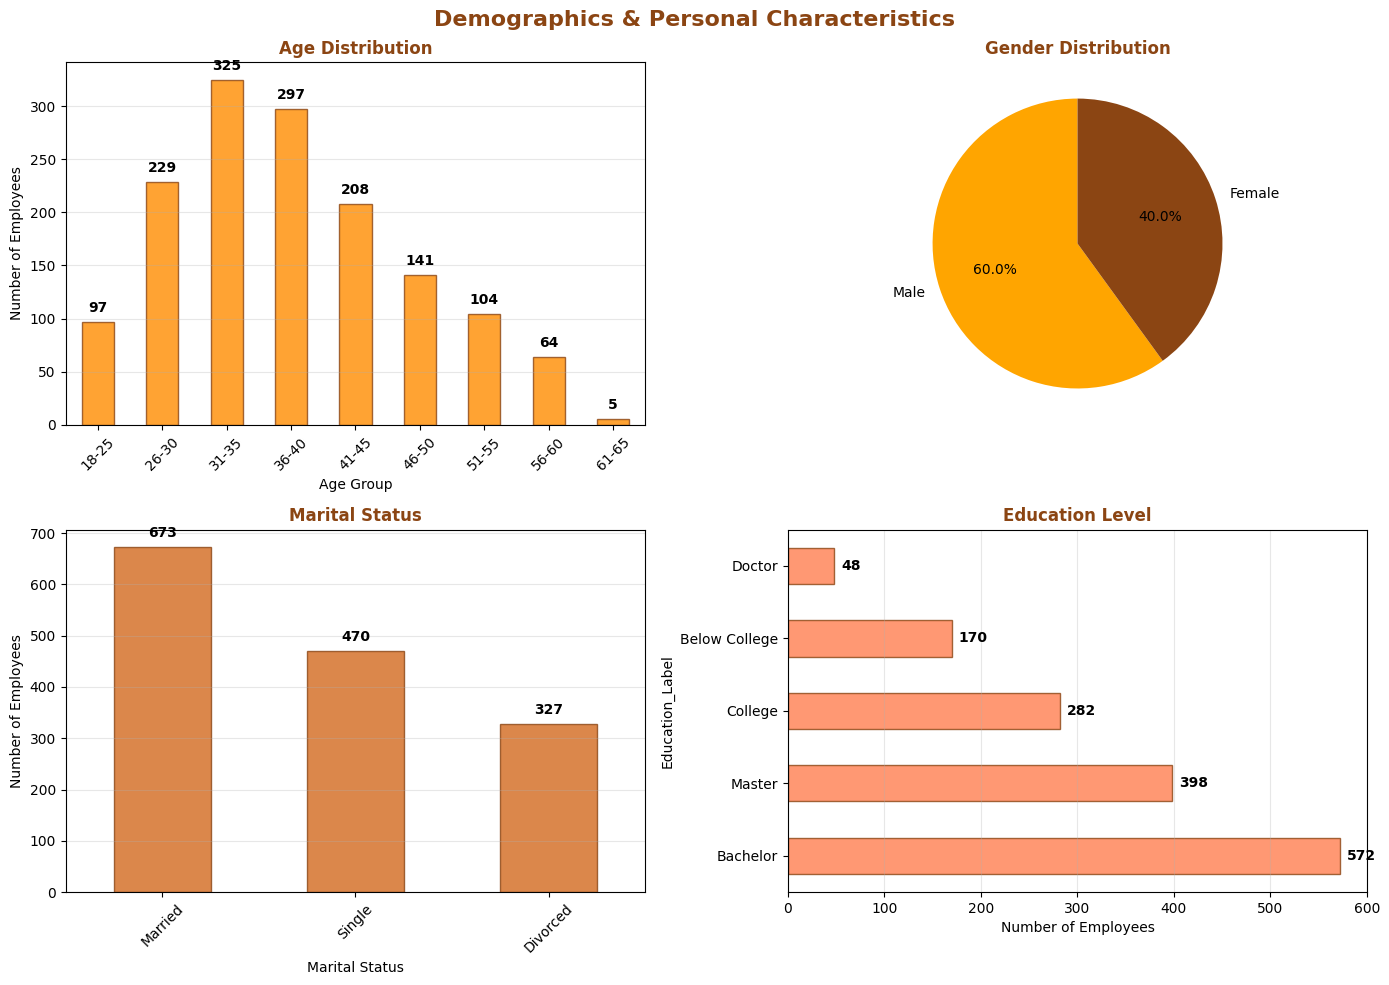


DEMOGRAPHIC STATISTICS:
----------------------------------------
• Average Age: 36.9 years
• Age Range: 18-60 years
• Male: 882 employees (60.0%)
• Female: 588 employees (40.0%)
• Marital Status: Married (most common)
• Average Education Level: 2.9/5


In [54]:
# CATEGORY 1: DEMOGRAPHICS & PERSONAL CHARACTERISTICS

fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
fig1.suptitle('Demographics & Personal Characteristics', fontsize=16, fontweight='bold', color='#8B4513')

# 1.1 Age Distribution
ax1 = axes1[0, 0]
if 'Age' in df.columns:
    age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
    age_labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    age_dist = df['Age_Group'].value_counts().sort_index()
    bars = age_dist.plot(kind='bar', ax=ax1, color='#FF8C00', edgecolor='#8B4513', alpha=0.8)
    ax1.set_title('Age Distribution', fontsize=12, fontweight='bold', color='#8B4513')
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Number of Employees')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax1)

# 1.2 Gender Distribution
ax2 = axes1[0, 1]
if 'Gender' in df.columns:
    gender_dist = df['Gender'].value_counts()
    colors = ['#FFA500', '#8B4513'][:len(gender_dist)]
    wedges, texts, autotexts = ax2.pie(gender_dist.values, labels=gender_dist.index, colors=colors, 
                                       autopct='%1.1f%%', startangle=90)
    ax2.set_title('Gender Distribution', fontsize=12, fontweight='bold', color='#8B4513')

# 1.3 Marital Status
ax3 = axes1[1, 0]
if 'MaritalStatus' in df.columns:
    marital_dist = df['MaritalStatus'].value_counts()
    bars = marital_dist.plot(kind='bar', ax=ax3, color='#D2691E', edgecolor='#8B4513', alpha=0.8)
    ax3.set_title('Marital Status', fontsize=12, fontweight='bold', color='#8B4513')
    ax3.set_xlabel('Marital Status')
    ax3.set_ylabel('Number of Employees')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax3)

# 1.4 Education Level
ax4 = axes1[1, 1]
if 'Education' in df.columns:
    education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
    df['Education_Label'] = df['Education'].map(education_map)
    edu_dist = df['Education_Label'].value_counts()
    bars = edu_dist.plot(kind='barh', ax=ax4, color='#FF7F50', edgecolor='#8B4513', alpha=0.8)
    ax4.set_title('Education Level', fontsize=12, fontweight='bold', color='#8B4513')
    ax4.set_xlabel('Number of Employees')
    ax4.grid(True, alpha=0.3, axis='x')
    add_horizontal_value_labels(ax4)

plt.tight_layout()
plt.savefig(f'{graphs_dir}01_demographics.png', dpi=300, bbox_inches='tight')
plt.show()

# Demographic Statistics
print("\nDEMOGRAPHIC STATISTICS:")
print("-" * 40)
print(f"• Average Age: {df['Age'].mean():.1f} years")
print(f"• Age Range: {df['Age'].min()}-{df['Age'].max()} years")
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    for gender, count in gender_counts.items():
        pct = (count / len(df)) * 100
        print(f"• {gender}: {count} employees ({pct:.1f}%)")
if 'MaritalStatus' in df.columns:
    marital_counts = df['MaritalStatus'].value_counts()
    print(f"• Marital Status: {marital_counts.idxmax()} (most common)")
if 'Education' in df.columns:
    edu_level = df['Education'].mean()
    print(f"• Average Education Level: {edu_level:.1f}/5")

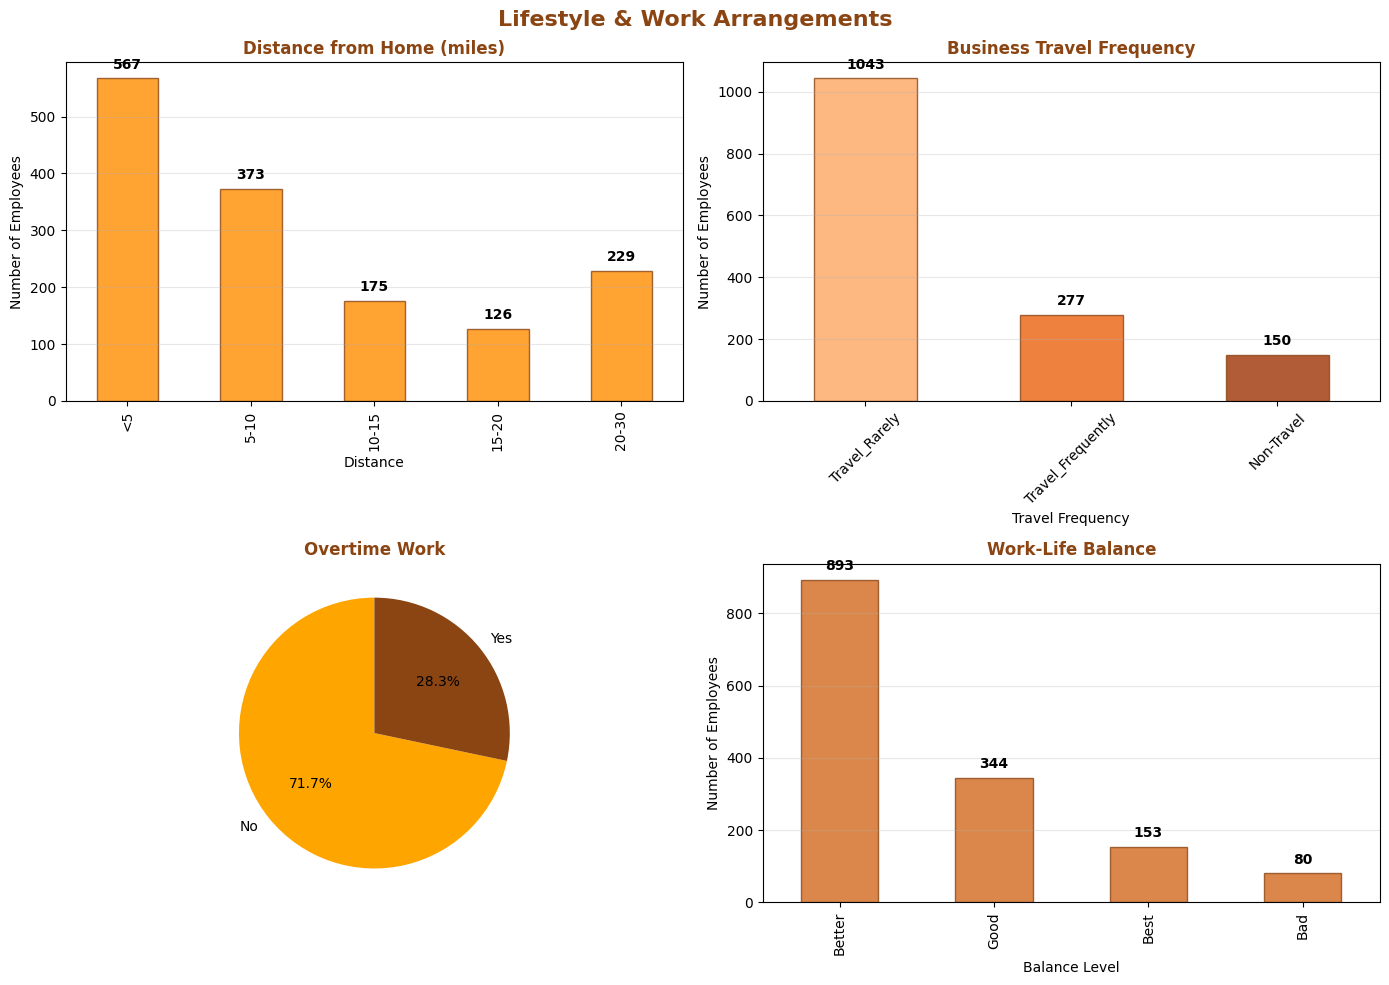


LIFESTYLE STATISTICS:
----------------------------------------
• Average Distance from Home: 9.2 miles
• Employees living >20 miles: 204
• Frequent Travelers: 0 employees
• Overtime Workers: 28.3%
• Average Work-Life Balance: 2.76/4


In [55]:
# CATEGORY 2: LIFESTYLE & WORK ARRANGEMENTS
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
fig2.suptitle('Lifestyle & Work Arrangements', fontsize=16, fontweight='bold', color='#8B4513')

# 2.1 Distance from Home - HISTOGRAM
ax1 = axes2[0, 0]
if 'DistanceFromHome' in df.columns:
    distance_bins = [0, 5, 10, 15, 20, 30]
    distance_labels = ['<5', '5-10', '10-15', '15-20', '20-30']
    df['Distance_Group'] = pd.cut(df['DistanceFromHome'], bins=distance_bins, labels=distance_labels, right=False)
    distance_dist = df['Distance_Group'].value_counts().sort_index()
    bars = distance_dist.plot(kind='bar', ax=ax1, color='#FF8C00', edgecolor='#8B4513', alpha=0.8)
    ax1.set_title('Distance from Home (miles)', fontsize=12, fontweight='bold', color='#8B4513')
    ax1.set_xlabel('Distance')
    ax1.set_ylabel('Number of Employees')
    ax1.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax1)
    
# 2.2 Business Travel Frequency
ax2 = axes2[0, 1]
if 'BusinessTravel' in df.columns:
    travel_dist = df['BusinessTravel'].value_counts()
    colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(travel_dist)))
    bars = travel_dist.plot(kind='bar', ax=ax2, color=colors, edgecolor='#8B4513', alpha=0.8)
    ax2.set_title('Business Travel Frequency', fontsize=12, fontweight='bold', color='#8B4513')
    ax2.set_xlabel('Travel Frequency')
    ax2.set_ylabel('Number of Employees')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax2)

# 2.3 Overtime Status
ax3 = axes2[1, 0]
if 'OverTime' in df.columns:
    overtime_dist = df['OverTime'].value_counts()
    colors = ['#FFA500', '#8B4513'][:len(overtime_dist)]
    wedges, texts, autotexts = ax3.pie(overtime_dist.values, labels=overtime_dist.index, colors=colors, 
                                       autopct='%1.1f%%', startangle=90)
    ax3.set_title('Overtime Work', fontsize=12, fontweight='bold', color='#8B4513')

# 2.4 Work-Life Balance
ax4 = axes2[1, 1]
if 'WorkLifeBalance' in df.columns:
    balance_labels = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
    df['WLB_Label'] = df['WorkLifeBalance'].map(balance_labels)
    wlb_dist = df['WLB_Label'].value_counts()
    bars = wlb_dist.plot(kind='bar', ax=ax4, color='#D2691E', edgecolor='#8B4513', alpha=0.8)
    ax4.set_title('Work-Life Balance', fontsize=12, fontweight='bold', color='#8B4513')
    ax4.set_xlabel('Balance Level')
    ax4.set_ylabel('Number of Employees')
    ax4.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax4)

plt.tight_layout()
plt.savefig(f'{graphs_dir}02_lifestyle_work_arrangements.png', dpi=300, bbox_inches='tight')
plt.show()

# Lifestyle Statistics
print("\nLIFESTYLE STATISTICS:")
print("-" * 40)
if 'DistanceFromHome' in df.columns:
    print(f"• Average Distance from Home: {df['DistanceFromHome'].mean():.1f} miles")
    print(f"• Employees living >20 miles: {(df['DistanceFromHome'] > 20).sum()}")
if 'BusinessTravel' in df.columns:
    travel_counts = df['BusinessTravel'].value_counts()
    print(f"• Frequent Travelers: {travel_counts.get('Travel Frequently', 0)} employees")
if 'OverTime' in df.columns:
    overtime_pct = (df['OverTime'] == 'Yes').mean() * 100
    print(f"• Overtime Workers: {overtime_pct:.1f}%")
if 'WorkLifeBalance' in df.columns:
    avg_wlb = df['WorkLifeBalance'].mean()
    print(f"• Average Work-Life Balance: {avg_wlb:.2f}/4")

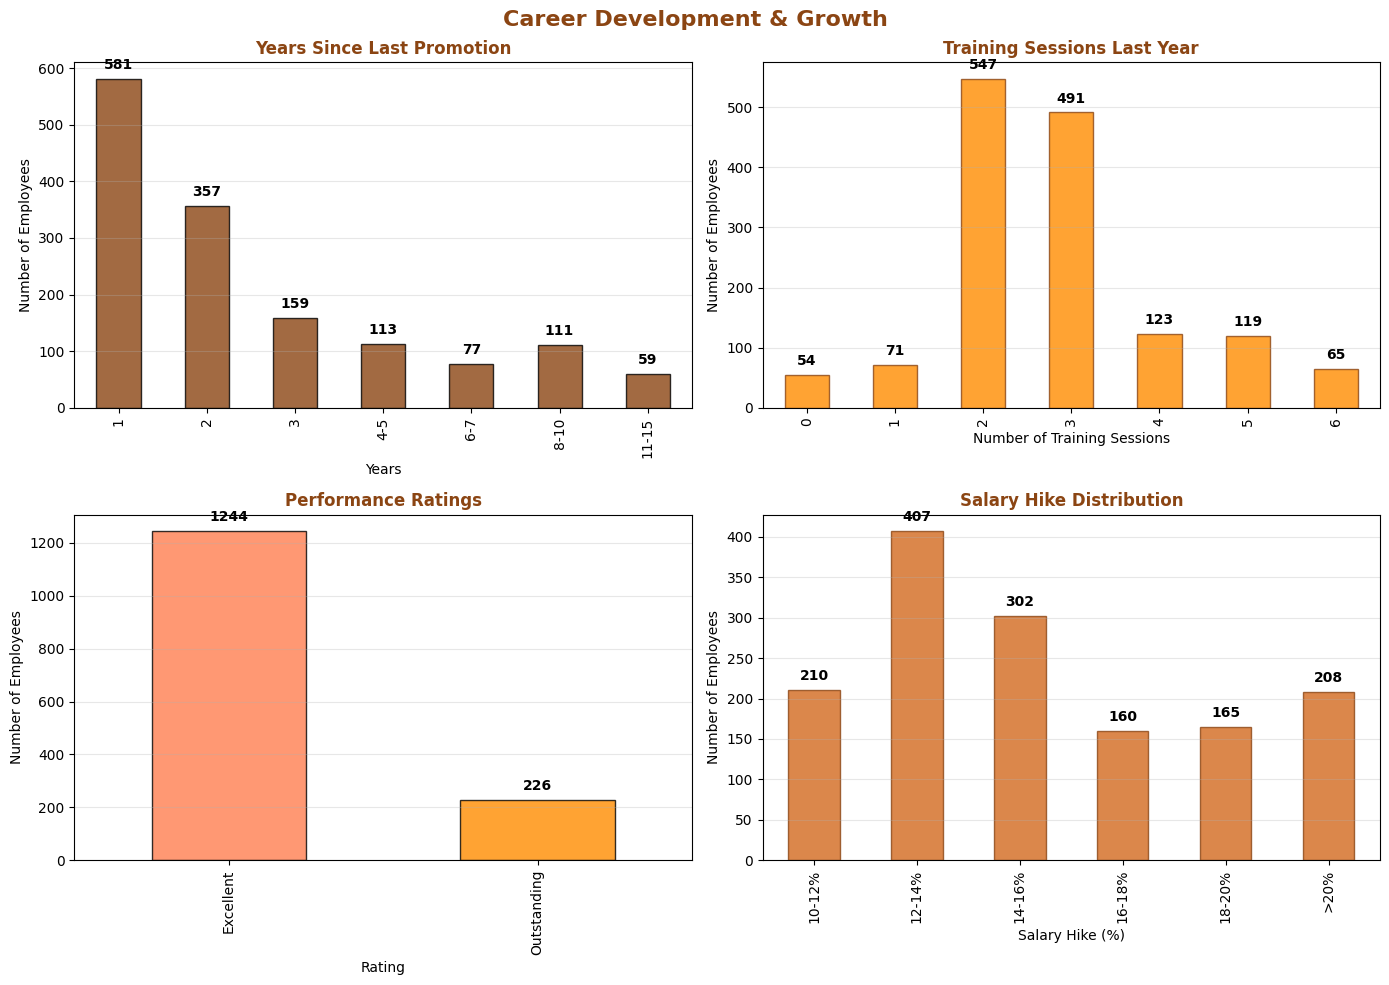


CAREER DEVELOPMENT STATISTICS:
----------------------------------------
• Average Years Since Last Promotion: 2.2 years
• Employees promoted in last year: 581
• Average Training Sessions: 2.8
• Employees with 0 training: 54
• Average Performance Rating: 3.15/4
• High Performers (≥3): 1470 employees
• Average Salary Hike: 15.2%


In [56]:
# CATEGORY 3: CAREER DEVELOPMENT & GROWTH
fig3, axes3 = plt.subplots(2, 2, figsize=(14, 10))
fig3.suptitle('Career Development & Growth', fontsize=16, fontweight='bold', color='#8B4513')

# 3.1 Years Since Last Promotion
ax1 = axes3[0, 0]
if 'YearsSinceLastPromotion' in df.columns:
    promo_bins = [0, 1, 2, 3, 5, 7, 10, 15]
    promo_labels = ['1', '2', '3', '4-5', '6-7', '8-10', '11-15']
    df['Promo_Group'] = pd.cut(df['YearsSinceLastPromotion'], bins=promo_bins, labels=promo_labels, right=False)
    promo_dist = df['Promo_Group'].value_counts().sort_index()
    bars = promo_dist.plot(kind='bar', ax=ax1, color='#8B4513', edgecolor='black', alpha=0.8)
    ax1.set_title('Years Since Last Promotion', fontsize=12, fontweight='bold', color='#8B4513')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Number of Employees')
    ax1.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax1)

# 3.2 Training Hours
ax2 = axes3[0, 1]
if 'TrainingTimesLastYear' in df.columns:
    training_dist = df['TrainingTimesLastYear'].value_counts().sort_index()
    bars = training_dist.plot(kind='bar', ax=ax2, color='#FF8C00', edgecolor='#8B4513', alpha=0.8)
    ax2.set_title('Training Sessions Last Year', fontsize=12, fontweight='bold', color='#8B4513')
    ax2.set_xlabel('Number of Training Sessions')
    ax2.set_ylabel('Number of Employees')
    ax2.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax2)

# 3.3 Performance Ratings
ax3 = axes3[1, 0]
if 'PerformanceRating' in df.columns:
    perf_labels = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
    df['Perf_Label'] = df['PerformanceRating'].map(perf_labels)
    perf_dist = df['Perf_Label'].value_counts()
    colors = ['#FF7F50', '#FF8C00', '#D2691E', '#8B4513']
    bars = perf_dist.plot(kind='bar', ax=ax3, color=colors[:len(perf_dist)], edgecolor='black', alpha=0.8)
    ax3.set_title('Performance Ratings', fontsize=12, fontweight='bold', color='#8B4513')
    ax3.set_xlabel('Rating')
    ax3.set_ylabel('Number of Employees')
    ax3.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax3)

# 3.4 Salary Hike Percentage
ax4 = axes3[1, 1]
if 'PercentSalaryHike' in df.columns:
    hike_bins = [10, 12, 14, 16, 18, 20, 25]
    hike_labels = ['10-12%', '12-14%', '14-16%', '16-18%', '18-20%', '>20%']
    df['Hike_Group'] = pd.cut(df['PercentSalaryHike'], bins=hike_bins, labels=hike_labels, right=False)
    hike_dist = df['Hike_Group'].value_counts().sort_index()
    bars = hike_dist.plot(kind='bar', ax=ax4, color='#D2691E', edgecolor='#8B4513', alpha=0.8)
    ax4.set_title('Salary Hike Distribution', fontsize=12, fontweight='bold', color='#8B4513')
    ax4.set_xlabel('Salary Hike (%)')
    ax4.set_ylabel('Number of Employees')
    ax4.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax4)

plt.tight_layout()
plt.savefig(f'{graphs_dir}03_career_development.png', dpi=300, bbox_inches='tight')
plt.show()

# Career Development Statistics
print("\nCAREER DEVELOPMENT STATISTICS:")
print("-" * 40)
if 'YearsSinceLastPromotion' in df.columns:
    print(f"• Average Years Since Last Promotion: {df['YearsSinceLastPromotion'].mean():.1f} years")
    print(f"• Employees promoted in last year: {(df['YearsSinceLastPromotion'] == 0).sum()}")
if 'TrainingTimesLastYear' in df.columns:
    print(f"• Average Training Sessions: {df['TrainingTimesLastYear'].mean():.1f}")
    print(f"• Employees with 0 training: {(df['TrainingTimesLastYear'] == 0).sum()}")
if 'PerformanceRating' in df.columns:
    print(f"• Average Performance Rating: {df['PerformanceRating'].mean():.2f}/4")
    high_performers = (df['PerformanceRating'] >= 3).sum()
    print(f"• High Performers (≥3): {high_performers} employees")
if 'PercentSalaryHike' in df.columns:
    print(f"• Average Salary Hike: {df['PercentSalaryHike'].mean():.1f}%")

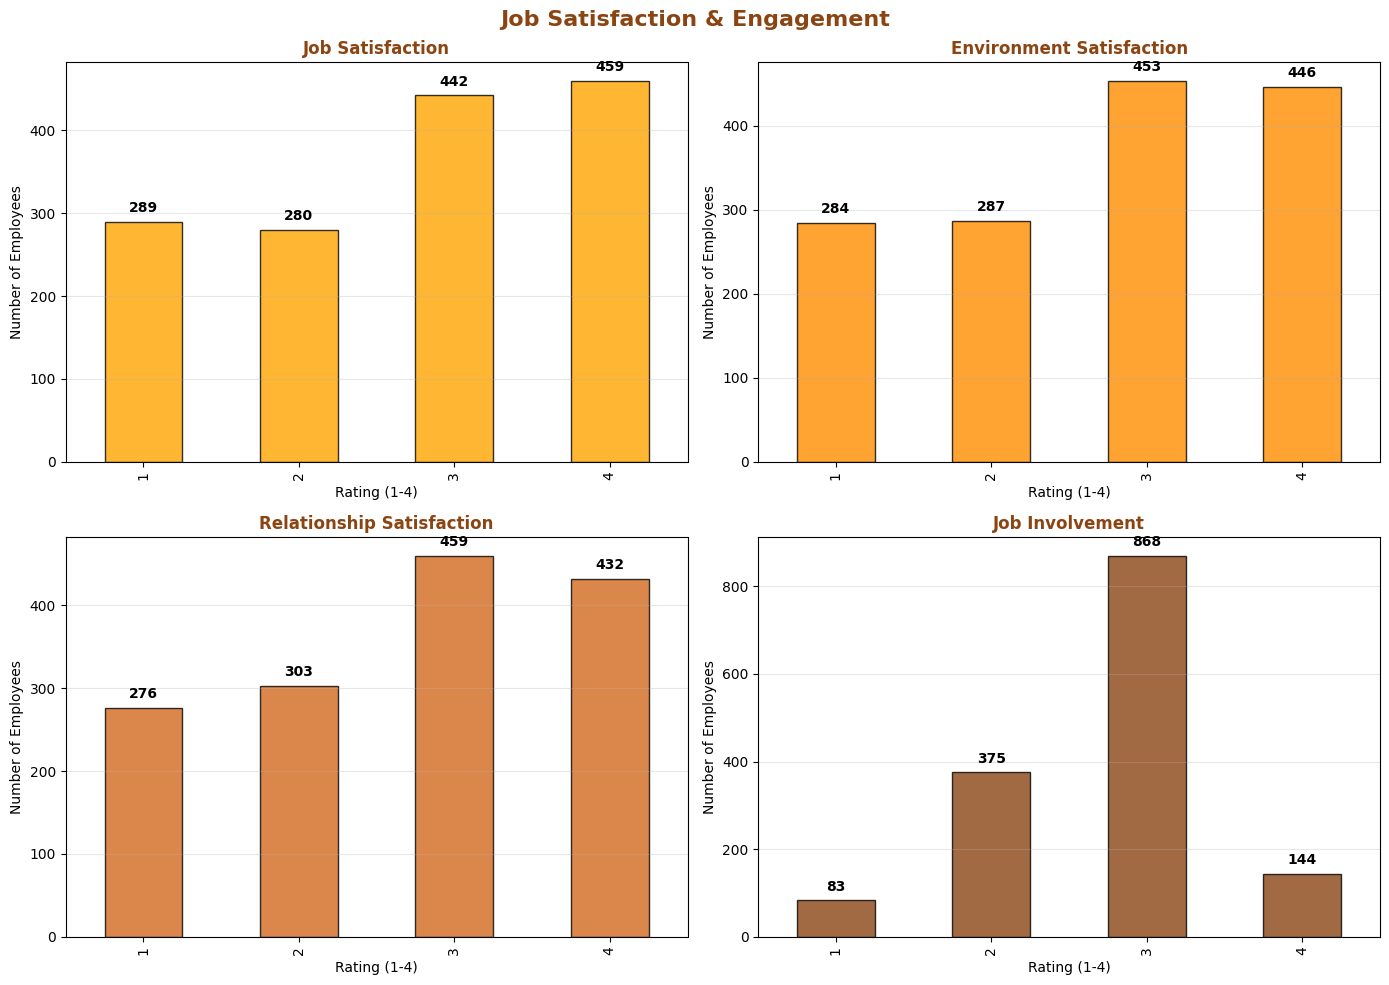


SATISFACTION & ENGAGEMENT STATISTICS:
----------------------------------------
• Average Job: 2.73/4
  - 61.3% rate 3 or higher
• Average Environment: 2.72/4
  - 61.2% rate 3 or higher
• Average Relationship: 2.71/4
  - 60.6% rate 3 or higher
• Average Job Involvement: 2.73/4
  - 68.8% rate 3 or higher


In [57]:
# CATEGORY 4: JOB SATISFACTION & ENGAGEMENT

satisfaction_metrics = ['JobSatisfaction', 'EnvironmentSatisfaction', 
                       'RelationshipSatisfaction', 'JobInvolvement']

if all(metric in df.columns for metric in satisfaction_metrics):
    fig4, axes4 = plt.subplots(2, 2, figsize=(14, 10))
    fig4.suptitle('Job Satisfaction & Engagement', fontsize=16, fontweight='bold', color='#8B4513')
    
    colors = ['#FFA500', '#FF8C00', '#D2691E', '#8B4513']
    titles = ['Job Satisfaction', 'Environment Satisfaction', 'Relationship Satisfaction', 'Job Involvement']
    
    for idx, (metric, title, color) in enumerate(zip(satisfaction_metrics, titles, colors)):
        ax = axes4[idx // 2, idx % 2]
        metric_dist = df[metric].value_counts().sort_index()
        bars = metric_dist.plot(kind='bar', ax=ax, color=color, edgecolor='black', alpha=0.8)
        ax.set_title(title, fontsize=12, fontweight='bold', color='#8B4513')
        ax.set_xlabel('Rating (1-4)')
        ax.set_ylabel('Number of Employees')
        ax.grid(True, alpha=0.3, axis='y')
        add_value_labels(ax)
    
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}04_job_satisfaction.png', dpi=300, bbox_inches='tight')
    plt.show()

# Satisfaction Statistics
print("\nSATISFACTION & ENGAGEMENT STATISTICS:")
print("-" * 40)
for metric in satisfaction_metrics:
    if metric in df.columns:
        avg_score = df[metric].mean()
        metric_name = metric.replace('Satisfaction', '').replace('JobInvolvement', 'Job Involvement')
        print(f"• Average {metric_name}: {avg_score:.2f}/4")
        high_satisfaction = (df[metric] >= 3).sum()
        pct_high = (high_satisfaction / len(df)) * 100
        print(f"  - {pct_high:.1f}% rate 3 or higher")

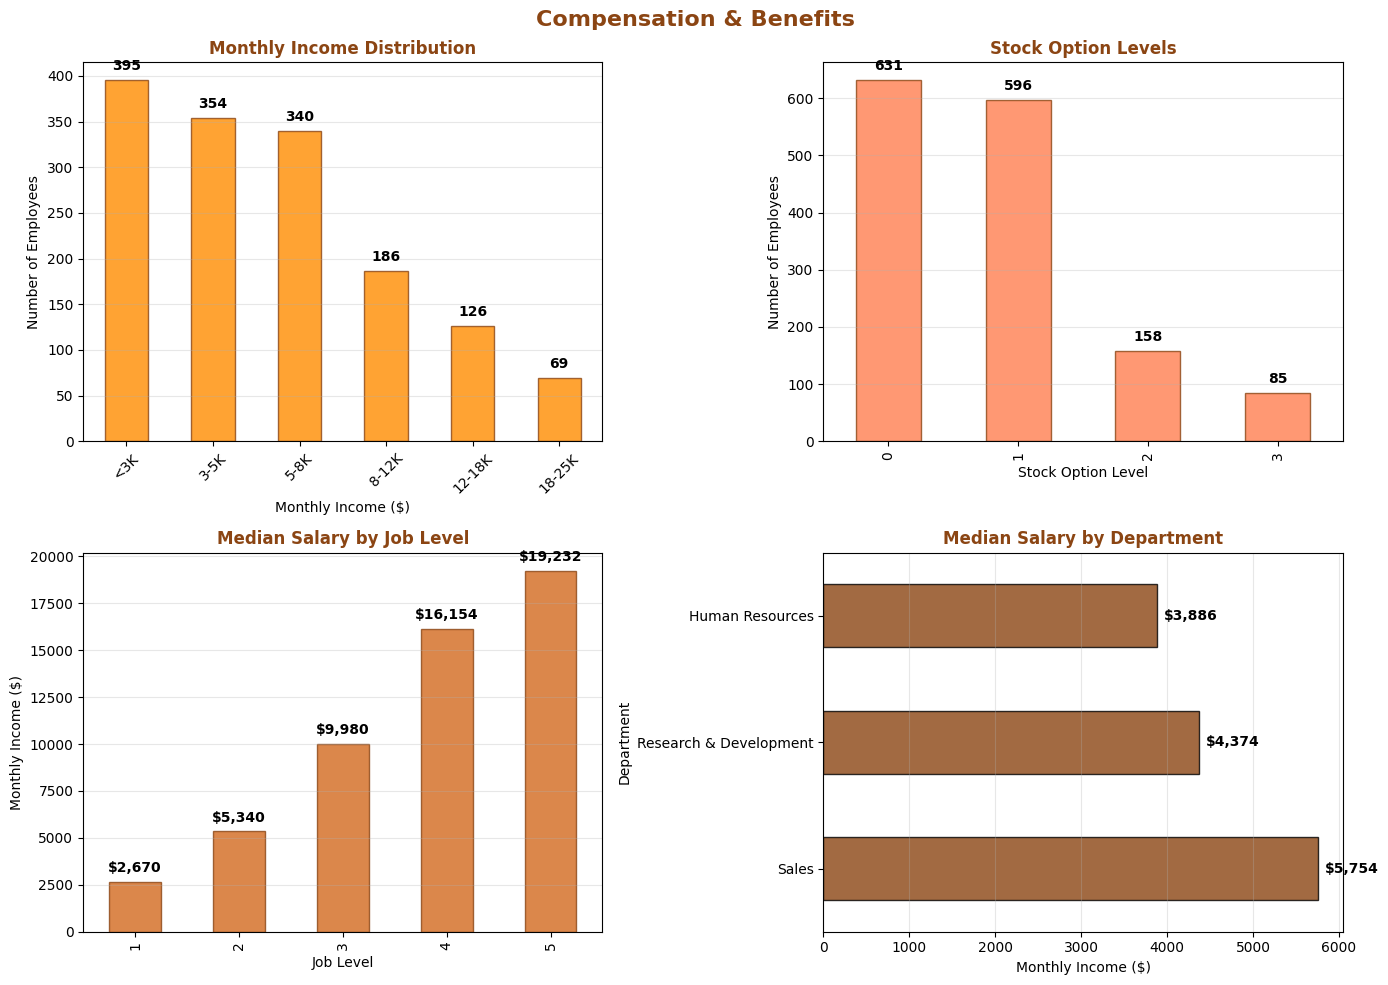


COMPENSATION STATISTICS:
----------------------------------------
• Average Monthly Income: $6,503
• Median Monthly Income: $4,919
• Income Range: $1,009 - $19,999
• Employees with Stock Options: 839
• Average Stock Option Level: 0.79
• Average Daily Rate: $802
• Average Hourly Rate: $66


In [58]:
# CATEGORY 5: COMPENSATION & BENEFITS
fig5, axes5 = plt.subplots(2, 2, figsize=(14, 10))
fig5.suptitle('Compensation & Benefits', fontsize=16, fontweight='bold', color='#8B4513')

# 5.1 Monthly Income Distribution
ax1 = axes5[0, 0]
if 'MonthlyIncome' in df.columns:
    income_brackets = [0, 3000, 5000, 8000, 12000, 18000, 25000]
    income_labels = ['<3K', '3-5K', '5-8K', '8-12K', '12-18K', '18-25K']
    df['Income_Bracket'] = pd.cut(df['MonthlyIncome'], bins=income_brackets, labels=income_labels, right=False)
    income_dist = df['Income_Bracket'].value_counts().sort_index()
    bars = income_dist.plot(kind='bar', ax=ax1, color='#FF8C00', edgecolor='#8B4513', alpha=0.8)
    ax1.set_title('Monthly Income Distribution', fontsize=12, fontweight='bold', color='#8B4513')
    ax1.set_xlabel('Monthly Income ($)')
    ax1.set_ylabel('Number of Employees')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax1)

# 5.2 Stock Option Levels
ax2 = axes5[0, 1]
if 'StockOptionLevel' in df.columns:
    stock_dist = df['StockOptionLevel'].value_counts().sort_index()
    bars = stock_dist.plot(kind='bar', ax=ax2, color='#FF7F50', edgecolor='#8B4513', alpha=0.8)
    ax2.set_title('Stock Option Levels', fontsize=12, fontweight='bold', color='#8B4513')
    ax2.set_xlabel('Stock Option Level')
    ax2.set_ylabel('Number of Employees')
    ax2.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax2)

# 5.3 Salary by Job Level
ax3 = axes5[1, 0]
if 'MonthlyIncome' in df.columns and 'JobLevel' in df.columns:
    salary_by_joblevel = df.groupby('JobLevel')['MonthlyIncome'].median().sort_index()
    bars = salary_by_joblevel.plot(kind='bar', ax=ax3, color='#D2691E', edgecolor='#8B4513', alpha=0.8)
    ax3.set_title('Median Salary by Job Level', fontsize=12, fontweight='bold', color='#8B4513')
    ax3.set_xlabel('Job Level')
    ax3.set_ylabel('Monthly Income ($)')
    ax3.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax3, format_str='${:,.0f}')

# 5.4 Salary by Department
ax4 = axes5[1, 1]
if 'MonthlyIncome' in df.columns and 'Department' in df.columns:
    salary_by_dept = df.groupby('Department')['MonthlyIncome'].median().sort_values(ascending=False)
    bars = salary_by_dept.plot(kind='barh', ax=ax4, color='#8B4513', edgecolor='black', alpha=0.8)
    ax4.set_title('Median Salary by Department', fontsize=12, fontweight='bold', color='#8B4513')
    ax4.set_xlabel('Monthly Income ($)')
    ax4.grid(True, alpha=0.3, axis='x')
    add_horizontal_value_labels(ax4, format_str='${:,.0f}')

plt.tight_layout()
plt.savefig(f'{graphs_dir}05_compensation_benefits.png', dpi=300, bbox_inches='tight')
plt.show()

# Compensation Statistics
print("\nCOMPENSATION STATISTICS:")
print("-" * 40)
if 'MonthlyIncome' in df.columns:
    print(f"• Average Monthly Income: ${df['MonthlyIncome'].mean():,.0f}")
    print(f"• Median Monthly Income: ${df['MonthlyIncome'].median():,.0f}")
    print(f"• Income Range: ${df['MonthlyIncome'].min():,.0f} - ${df['MonthlyIncome'].max():,.0f}")
if 'StockOptionLevel' in df.columns:
    print(f"• Employees with Stock Options: {(df['StockOptionLevel'] > 0).sum()}")
    print(f"• Average Stock Option Level: {df['StockOptionLevel'].mean():.2f}")
if 'DailyRate' in df.columns:
    print(f"• Average Daily Rate: ${df['DailyRate'].mean():,.0f}")
if 'HourlyRate' in df.columns:
    print(f"• Average Hourly Rate: ${df['HourlyRate'].mean():,.0f}")

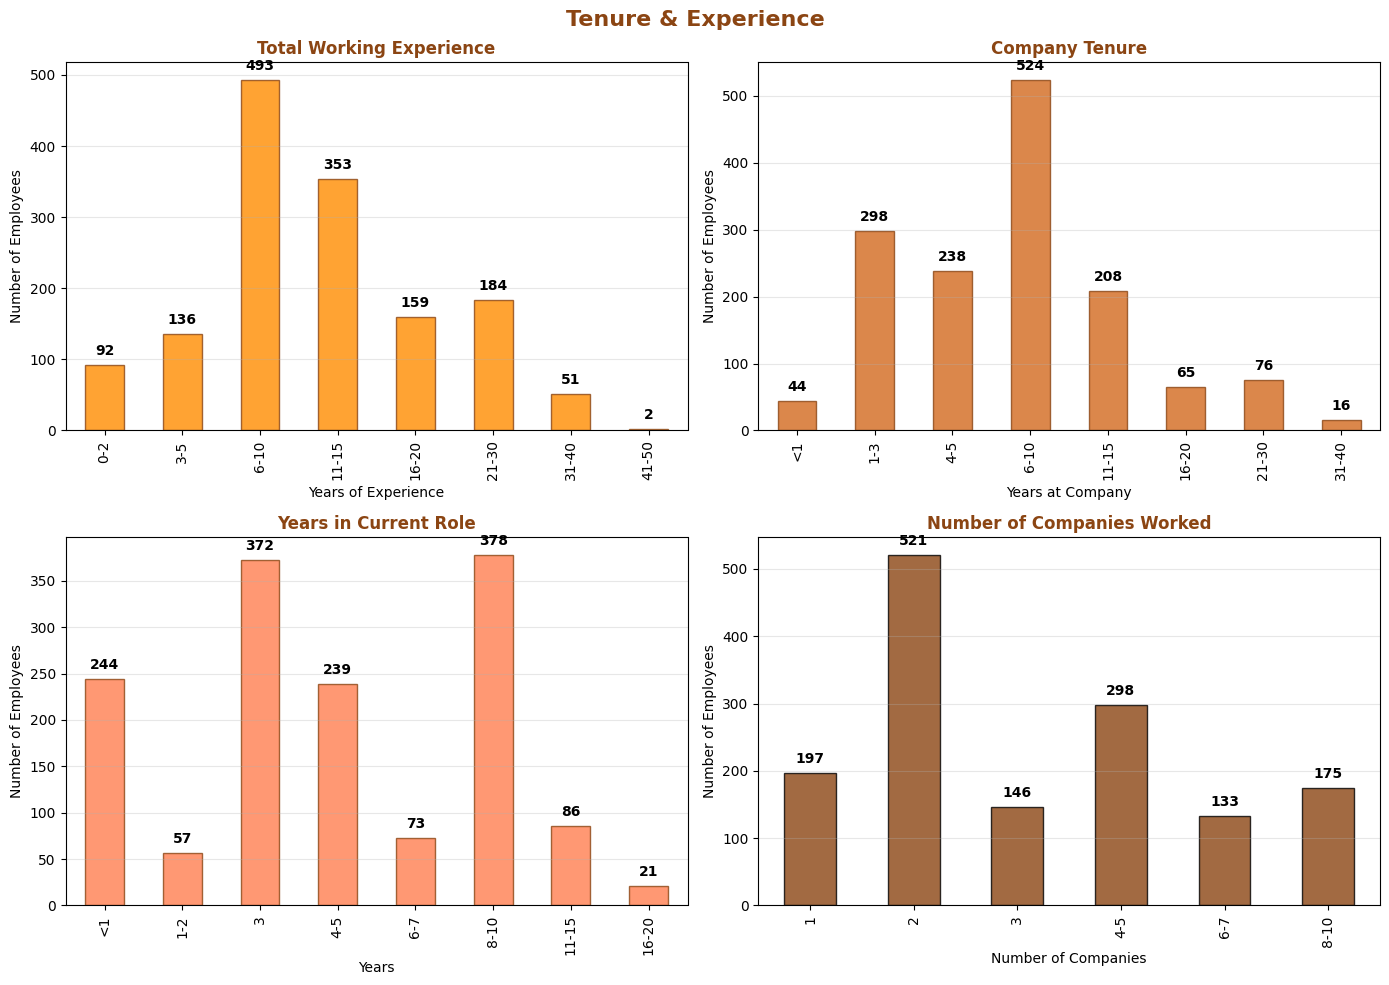


TENURE & EXPERIENCE STATISTICS:
----------------------------------------
• Average Total Experience: 11.3 years
• Average Company Tenure: 7.0 years
• New Hires (<1 year): 44
• Average Time in Current Role: 4.2 years
• Average Companies Worked At: 2.7


In [59]:
# CATEGORY 6: TENURE & EXPERIENCE
fig6, axes6 = plt.subplots(2, 2, figsize=(14, 10))
fig6.suptitle('Tenure & Experience', fontsize=16, fontweight='bold', color='#8B4513')

# 6.1 Total Working Experience
ax1 = axes6[0, 0]
if 'TotalWorkingYears' in df.columns:
    exp_bins = [0, 2, 5, 10, 15, 20, 30, 40, 50]
    exp_labels = ['0-2', '3-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50']
    df['Experience_Group'] = pd.cut(df['TotalWorkingYears'], bins=exp_bins, labels=exp_labels, right=False)
    exp_dist = df['Experience_Group'].value_counts().sort_index()
    bars = exp_dist.plot(kind='bar', ax=ax1, color='#FF8C00', edgecolor='#8B4513', alpha=0.8)
    ax1.set_title('Total Working Experience', fontsize=12, fontweight='bold', color='#8B4513')
    ax1.set_xlabel('Years of Experience')
    ax1.set_ylabel('Number of Employees')
    ax1.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax1)

# 6.2 Company Tenure
ax2 = axes6[0, 1]
if 'YearsAtCompany' in df.columns:
    tenure_bins = [0, 1, 3, 5, 10, 15, 20, 30, 40]
    tenure_labels = ['<1', '1-3', '4-5', '6-10', '11-15', '16-20', '21-30', '31-40']
    df['Tenure_Group'] = pd.cut(df['YearsAtCompany'], bins=tenure_bins, labels=tenure_labels, right=False)
    tenure_dist = df['Tenure_Group'].value_counts().sort_index()
    bars = tenure_dist.plot(kind='bar', ax=ax2, color='#D2691E', edgecolor='#8B4513', alpha=0.8)
    ax2.set_title('Company Tenure', fontsize=12, fontweight='bold', color='#8B4513')
    ax2.set_xlabel('Years at Company')
    ax2.set_ylabel('Number of Employees')
    ax2.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax2)

# 6.3 Years in Current Role
ax3 = axes6[1, 0]
if 'YearsInCurrentRole' in df.columns:
    role_bins = [0, 1, 2, 3, 5, 7, 10, 15, 20]
    role_labels = ['<1', '1-2', '3', '4-5', '6-7', '8-10', '11-15', '16-20']
    df['Role_Tenure_Group'] = pd.cut(df['YearsInCurrentRole'], bins=role_bins, labels=role_labels, right=False)
    role_tenure_dist = df['Role_Tenure_Group'].value_counts().sort_index()
    bars = role_tenure_dist.plot(kind='bar', ax=ax3, color='#FF7F50', edgecolor='#8B4513', alpha=0.8)
    ax3.set_title('Years in Current Role', fontsize=12, fontweight='bold', color='#8B4513')
    ax3.set_xlabel('Years')
    ax3.set_ylabel('Number of Employees')
    ax3.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax3)

# 6.4 Number of Companies Worked
ax4 = axes6[1, 1]
if 'NumCompaniesWorked' in df.columns:
    companies_bins = [0, 1, 2, 3, 5, 7, 10]
    companies_labels = ['1', '2', '3', '4-5', '6-7', '8-10']
    df['Companies_Group'] = pd.cut(df['NumCompaniesWorked'], bins=companies_bins, labels=companies_labels, right=False)
    companies_dist = df['Companies_Group'].value_counts().sort_index()
    bars = companies_dist.plot(kind='bar', ax=ax4, color='#8B4513', edgecolor='black', alpha=0.8)
    ax4.set_title('Number of Companies Worked', fontsize=12, fontweight='bold', color='#8B4513')
    ax4.set_xlabel('Number of Companies')
    ax4.set_ylabel('Number of Employees')
    ax4.grid(True, alpha=0.3, axis='y')
    add_value_labels(ax4)

plt.tight_layout()
plt.savefig(f'{graphs_dir}06_tenure_experience.png', dpi=300, bbox_inches='tight')
plt.show()

# Tenure Statistics
print("\nTENURE & EXPERIENCE STATISTICS:")
print("-" * 40)
if 'TotalWorkingYears' in df.columns:
    print(f"• Average Total Experience: {df['TotalWorkingYears'].mean():.1f} years")
if 'YearsAtCompany' in df.columns:
    print(f"• Average Company Tenure: {df['YearsAtCompany'].mean():.1f} years")
    print(f"• New Hires (<1 year): {(df['YearsAtCompany'] < 1).sum()}")
if 'YearsInCurrentRole' in df.columns:
    print(f"• Average Time in Current Role: {df['YearsInCurrentRole'].mean():.1f} years")
if 'NumCompaniesWorked' in df.columns:
    print(f"• Average Companies Worked At: {df['NumCompaniesWorked'].mean():.1f}")

In [60]:
# FINAL SUMMARY
summary_data = [
    ("Total Employees", f"{len(df):,}"),
    ("Average Age", f"{df['Age'].mean():.1f} years"),
    ("Average Tenure", f"{df['YearsAtCompany'].mean():.1f} years" if 'YearsAtCompany' in df.columns else "N/A"),
    ("Average Salary", f"${df['MonthlyIncome'].mean():,.0f}" if 'MonthlyIncome' in df.columns else "N/A"),
    ("Attrition Rate", f"{(df['Attrition'] == 'Yes').mean() * 100:.1f}%" if 'Attrition' in df.columns else "N/A"),
    ("Avg Job Satisfaction", f"{df['JobSatisfaction'].mean():.2f}/4" if 'JobSatisfaction' in df.columns else "N/A"),
    ("Overtime Workers", f"{(df['OverTime'] == 'Yes').mean() * 100:.1f}%" if 'OverTime' in df.columns else "N/A"),
    ("High Performers (≥3)", f"{(df['PerformanceRating'] >= 3).sum()}" if 'PerformanceRating' in df.columns else "N/A"),
]

print("\nKEY METRICS:")
print("-" * 40)
for metric, value in summary_data:
    print(f"• {metric:<25} {value}")


KEY METRICS:
----------------------------------------
• Total Employees           1,470
• Average Age               36.9 years
• Average Tenure            7.0 years
• Average Salary            $6,503
• Attrition Rate            16.1%
• Avg Job Satisfaction      2.73/4
• Overtime Workers          28.3%
• High Performers (≥3)      1470
